<a href="https://colab.research.google.com/github/TTrogdon22/Data-Science-/blob/main/TiernanTrogdonFinal_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

STA 2023 Final Project
Directions:
1) Replace the image dataset in the google slides with your own data.

2) Comment and explain all code to the best of your ability.

3) Run your model 3 times.

4) Report best, worst, and average of the three runs.

Use any and all resources available to you.

Comment and explain the code.

Answer the questions to the best of your abilities.

If you have any questions, txt 561-479-8123

Save this notebook to your GitHub and submit the link on Canvas

https://tensorspace.org/

In [ ]:
%%capture
!pip install wandb
!apt-get install poppler-utils
!pip install pdf2image
!pip install flashtorch
import requests
from pdf2image import convert_from_path
import matplotlib.pyplot as plt
import numpy as np
import torch
import requests
from torchvision import *
from torchvision.models import *
from flashtorch.utils import apply_transforms
import wandb as wb

importing convert from path,plt,np,torch,requests,and wb 

In [ ]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

def plot(x):
    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(5, 5)
    plt.show()
    
def get_google_slide(url):
    url_head = "https://docs.google.com/presentation/d/"
    url_body = url.split('/')[5]
    page_id = url.split('.')[-1]
    return url_head + url_body + "/export/pdf?id=" + url_body + "&pageid=" + page_id

def get_slides(url):
    url = get_google_slide(url)
    r = requests.get(url, allow_redirects=True)
    open('file.pdf', 'wb').write(r.content)
    images = convert_from_path('file.pdf', 500)
    return images

def load(image):

    return apply_transforms(image).clone().detach().requires_grad_(True).to(device)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

defining gpu data, gpu, plot of x get google slide, get slides, and load of image 

In [ ]:
labels = {int(key):value for (key, value) in requests.get('https://s3.amazonaws.com/mlpipes/pytorch-quick-start/labels.json').json().items()}

model = alexnet(weights='DEFAULT').to(device)
model.eval();

giving label a value 

In [ ]:
url = "https://docs.google.com/presentation/d/1lyE52a0yLCu9iUiKeFmdKayGJhu2Z6fyToXEMKeigoY/edit#slide=id.p"

In [ ]:
url = "https://docs.google.com/presentation/d/1xHfjaJFtr1-jFeNoCpZveLr2jU3zUPgPjKL_S5rgKXw/edit#slide=id.g1a97ff0d1d9_0_144"

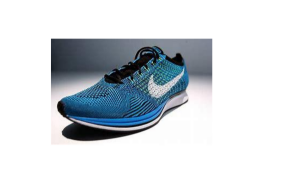

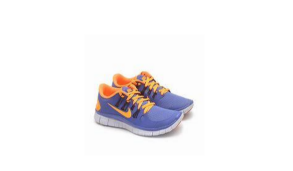

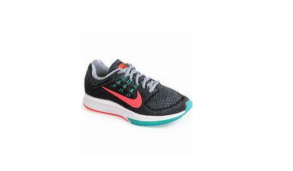

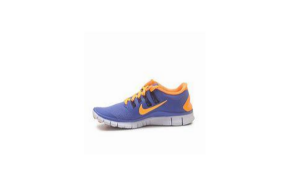

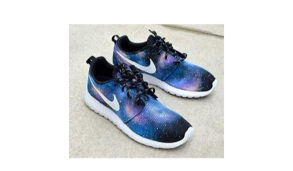

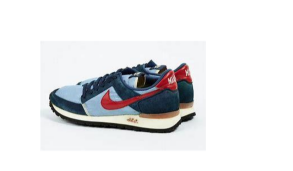

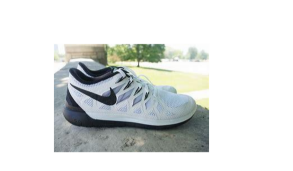

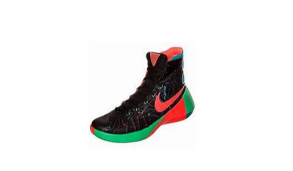

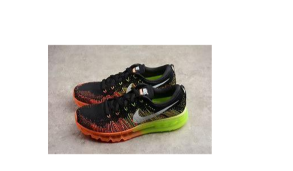

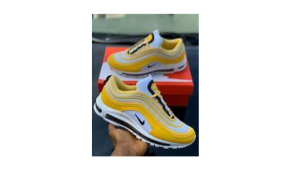

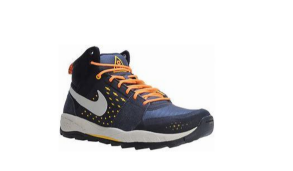

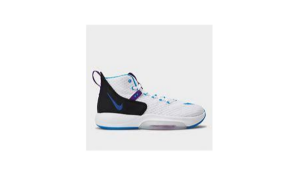

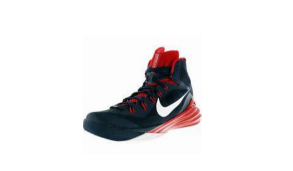

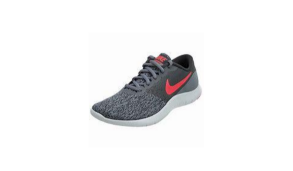

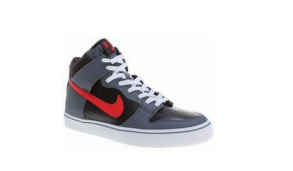

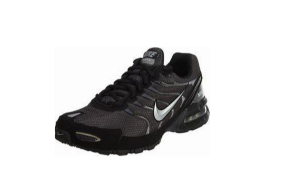

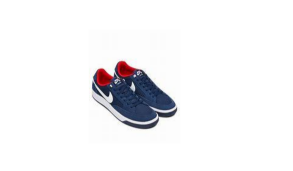

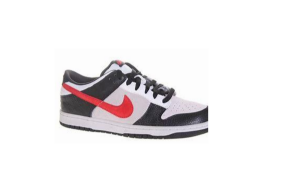

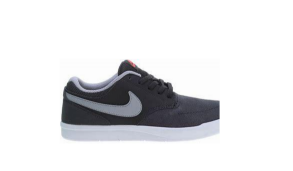

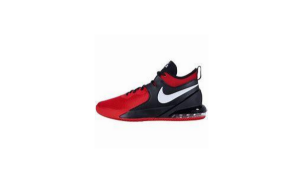

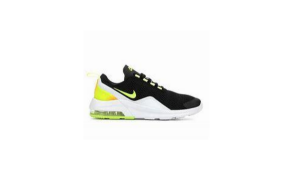

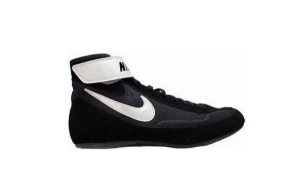

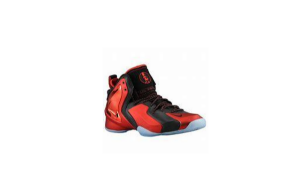

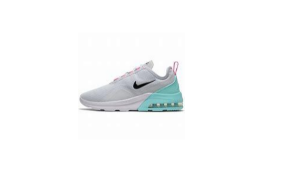

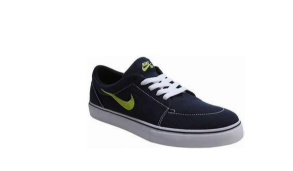

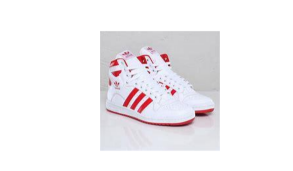

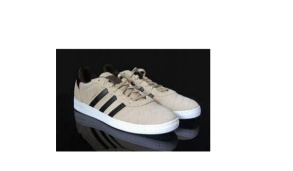

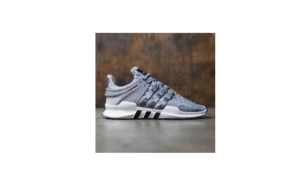

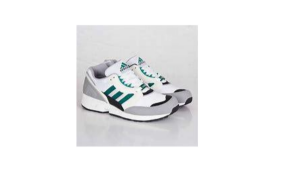

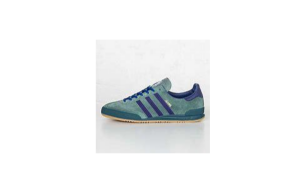

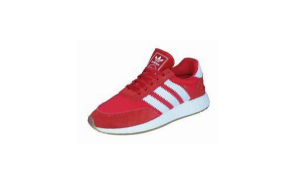

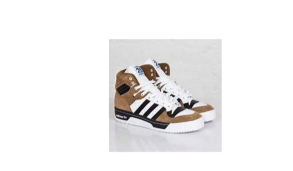

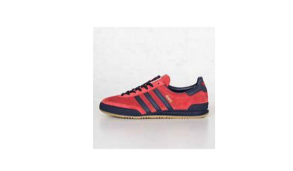

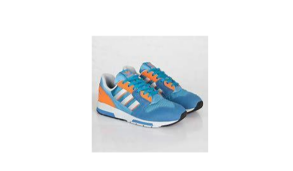

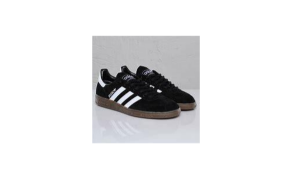

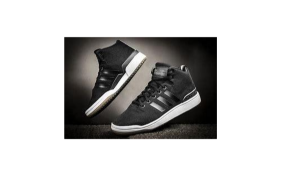

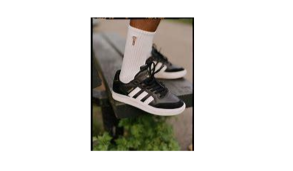

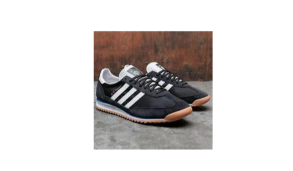

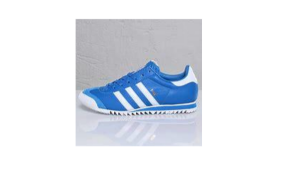

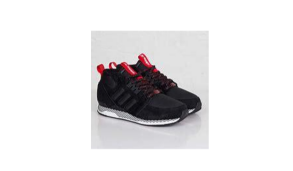

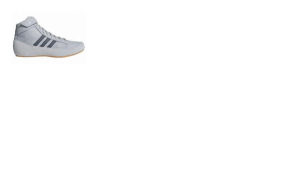

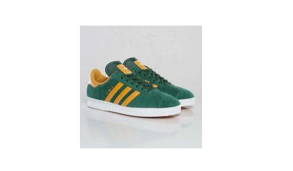

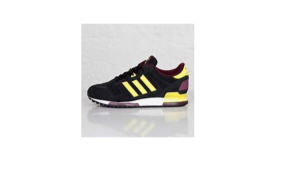

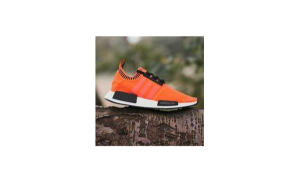

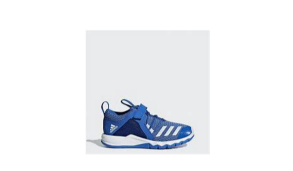

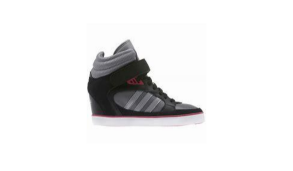

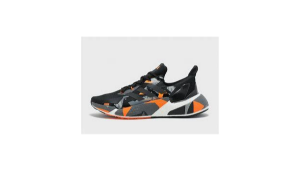

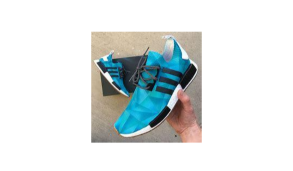

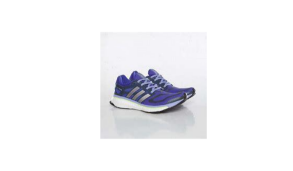

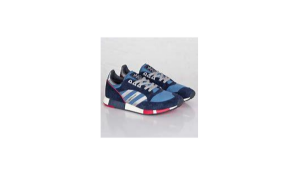

In [ ]:
images = []

for image in get_slides(url):

    plot(image)

    images.append(load(image))

images = torch.vstack(images)

giving images of shoes of nike and addidas 

In [ ]:
images.shape

torch.Size([50, 3, 224, 224])

In [ ]:
model(images)

tensor([[-0.9207, -4.4419, -1.9190,  ..., -3.6279, -0.8981,  3.1683],
        [ 0.0674, -1.7212, -3.8786,  ..., -1.5112,  3.2551,  1.6527],
        [-0.0154, -0.9897, -4.9244,  ..., -5.7762,  2.4863,  1.0675],
        ...,
        [-0.6499, -2.1920, -1.3499,  ..., -2.3384,  0.2120,  0.6904],
        [-1.7111, -0.9758, -3.3966,  ..., -4.4461, -0.7412,  4.1637],
        [-2.7984, -1.6923, -4.4003,  ..., -5.3250, -1.2805,  2.4731]],
       device='cuda:0', grad_fn=<AddmmBackward0>)

In [ ]:
y = model(images)

giving y a value 

In [ ]:
y.shape

torch.Size([50, 1000])

In [ ]:
guesses = torch.argmax(y, 1).cpu().numpy()

giving guesses a value 

In [ ]:
for i in list(guesses):
    print(labels[i])

running shoe
clog, geta, patten, sabot
running shoe
clog, geta, patten, sabot
running shoe
running shoe
running shoe
clog, geta, patten, sabot
running shoe
can opener, tin opener
running shoe
iron, smoothing iron
running shoe
running shoe
running shoe
running shoe
joystick
running shoe
running shoe
running shoe
running shoe
running shoe
chain saw, chainsaw
iron, smoothing iron
running shoe
Band Aid
running shoe
screen, CRT screen
can opener, tin opener
iron, smoothing iron
running shoe
face powder
running shoe
toilet seat
running shoe
can opener, tin opener
paper towel
binder, ring-binder
scale, weighing machine
running shoe
corkscrew, bottle screw
running shoe
lipstick, lip rouge
admiral
paper towel
running shoe
running shoe
mailbag, postbag
iron, smoothing iron
lighter, light, igniter, ignitor


finind guess for images 

In [ ]:
Y = np.zeros(50,)
Y[25:] = 1

giving y a value 

In [ ]:
Y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

y data 

In [ ]:
X = y.detach().cpu().numpy() 

giving x a value 

In [ ]:
X.shape

(50, 1000)

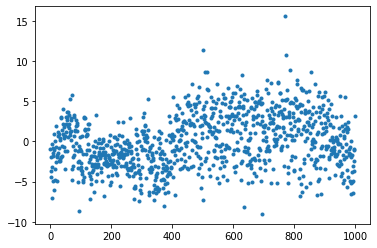

In [ ]:
plt.plot(X[0],'.')

plotting data of images 

In [ ]:
X[0]

array([-9.20695841e-01, -4.44190931e+00, -1.91897094e+00, -3.61683393e+00,
       -6.98118830e+00, -2.74638981e-01, -3.22712374e+00, -1.82336783e+00,
       -1.47065699e+00, -4.94520903e+00, -8.76290083e-01, -1.09416628e+00,
        9.67970490e-01, -6.01229572e+00,  4.36556973e-02, -3.39106584e+00,
       -4.75159454e+00,  1.87367451e+00, -6.79923117e-01, -2.60461974e+00,
       -1.82774961e+00, -1.63141930e+00, -4.94010782e+00, -1.99589694e+00,
        1.23204756e+00,  6.59100890e-01, -1.44762027e+00,  8.92527223e-01,
       -7.88343966e-01, -2.41421270e+00,  1.99734345e-01, -2.21801424e+00,
        3.84546280e-01, -2.38350463e+00,  3.01194358e+00, -1.93342876e+00,
        2.87880611e+00, -5.84681988e-01,  1.44712710e+00, -1.77052212e+00,
        2.13663363e+00,  4.02845049e+00,  8.67430985e-01,  1.81532490e+00,
        6.31280243e-01,  4.68451023e-01, -6.79484308e-01,  6.82071567e-01,
       -3.45231938e+00, -1.20064819e+00,  1.18872118e+00,  3.04915738e+00,
        2.15031672e+00,  

data od x 

In [ ]:
np.argmax(X[0])

770

argmax of x times 0 equals 770 

In [ ]:
labels[770]

'running shoe'

label 770 equals running shoe 

In [ ]:
np.argsort(X[0])[::-1][0:10]

array([770, 502, 774, 788, 855, 515, 507, 630, 711, 808])

top 10 guesses for images 

In [ ]:
top_ten = np.argsort(X[0])[::-1][0:10]

giving top ten a value 

In [ ]:
for i in top_ten:
    print(labels[i])

running shoe
clog, geta, patten, sabot
sandal
shoe shop, shoe-shop, shoe store
thimble
cowboy hat, ten-gallon hat
combination lock
Loafer
perfume, essence
sombrero


showing top ten guesses 

(array([ 16.,  90., 229., 270., 221., 132.,  34.,   5.,   2.,   1.]),
 array([-9.022727 , -6.561402 , -4.1000767, -1.6387513,  0.822574 ,
         3.2838993,  5.7452245,  8.20655  , 10.667875 , 13.1292   ,
        15.590526 ], dtype=float32),
 <a list of 10 Patch objects>)

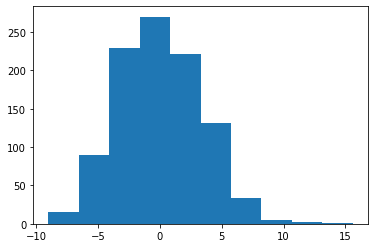

In [ ]:
plt.hist(X[0])

plotting guesses of images 

In [ ]:
X = GPU_data(X)
Y = GPU_data(Y)

giving x and y values 

In [ ]:
def softmax(x):
    s1 = torch.exp(x - torch.max(x,1)[0][:,None])
    s = s1 / s1.sum(1)[:,None]
    return s

defining softmax of x 

In [ ]:
def cross_entropy(outputs, labels):            
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0]  

defining cross entophy of outputs and labels 

In [ ]:
def randn_trunc(s): #Truncated Normal Random Numbers
    mu = 0 
    sigma = 0.1
    R = stats.truncnorm((-2*sigma - mu) / sigma, (2*sigma - mu) / sigma, loc=mu, scale=sigma)
    return R.rvs(s)

defining randn trunc of s 

In [ ]:
def Truncated_Normal(size):

    u1 = torch.rand(size)*(1-np.exp(-2)) + np.exp(-2)
    u2 = torch.rand(size)
    z  = torch.sqrt(-2*torch.log(u1)) * torch.cos(2*np.pi*u2)

    return z

defiing truncated normal od size 

In [ ]:
def acc(out,y):
    with torch.no_grad():
        return (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0]

defining acc of out and y 

In [ ]:
X.shape

torch.Size([50, 1000])

In [ ]:
def get_batch(mode):
    b = c.b
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

defining get batch of mode 

In [ ]:
def model(x,w):

    return x@w[0]

defining model of x and w 

In [ ]:
def make_plots():
    
    acc_train = acc(model(x,w),y)
    
    # xt,yt = get_batch('test')

    # acc_test = acc(model(xt,w),yt)

    wb.log({"acc_train": acc_train})

defining make plots 

In [ ]:
wb.init(project="Linear_Model_Photo_1");
c = wb.config

c.h = 0.001
c.b = 32
c.epochs = 100000

w = [GPU(Truncated_Normal((1000,2)))]

optimizer = torch.optim.Adam(w, lr=c.h)  

for i in range(c.epochs):

    x,y = get_batch('train')

    loss = cross_entropy(softmax(model(x,w)),y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
   
    wb.log({"loss": loss})

    make_plots()


<ipython-input-72-4608b466ff03>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))


funtion for guess accuracy which came out to 82 percent accuracy 